In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import

In [ ]:
import pandas as pd
from transformers import BertTokenizer
import matplotlib.pyplot as plt

In [ ]:
data_path = "/content/drive/MyDrive/ClinicalNotesGen/Data/speaker_role/speaker_role_dataset.parquet"

In [ ]:
df = pd.read_parquet(data_path)
print(df.shape)

(17979, 6)


In [ ]:
df.head(3)

,dialogue_index,speaker_role,text,utterance_count,dialogue_length,turn_indices
0,0,doctor,"Hello, how can I help you today? I see. Can yo...",8,14,"[0, 2, 4, 5, 6, 8, 10, 12]"
1,0,patient,My son has been having some issues with speech...,6,14,"[1, 3, 7, 9, 11, 13]"
2,1,doctor,"Hello, what brings you in today? I see. Did yo...",10,22,"[0, 2, 4, 6, 9, 11, 13, 15, 18, 20]"


In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Stats of token length

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
import numpy as np

## Train

### Distribution

In [ ]:
# Compute token lengths and add to DataFrame
df["token_length"] = df["text"].apply(
    lambda x: len(tokenizer.encode(x, truncation=False))
)

In [ ]:
# Split by speaker role
doctor_lengths = df[df["speaker_role"] == "doctor"]["token_length"]
patient_lengths = df[df["speaker_role"] == "patient"]["token_length"]

# Summary stats
def print_stats(lengths, role):
    print(f"\n{role.capitalize()} Token Lengths:")
    print(f"  Mean: {lengths.mean():.2f}")
    print(f"  95th percentile: {lengths.quantile(0.95):.0f}")
    print(f"  Max: {lengths.max()}")

print_stats(doctor_lengths, "doctor")
print_stats(patient_lengths, "patient")


Doctor Token Lengths:
  Mean: 460.54
  95th percentile: 609
  Max: 820

Patient Token Lengths:
  Mean: 136.34
  95th percentile: 260
  Max: 570


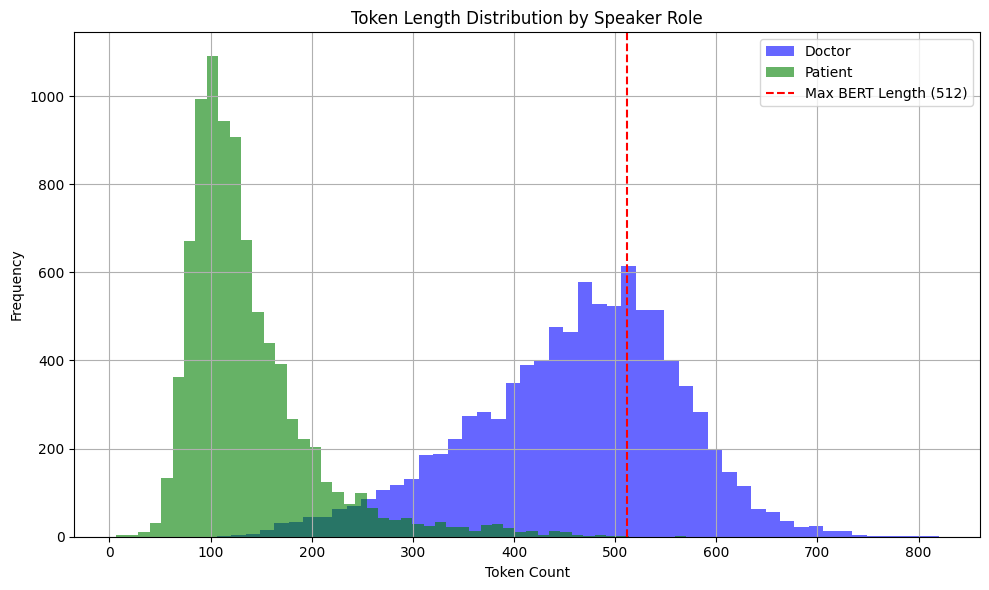

In [ ]:
# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(doctor_lengths, bins=50, alpha=0.6, label='Doctor', color='blue')
plt.hist(patient_lengths, bins=50, alpha=0.6, label='Patient', color='green')
plt.axvline(512, color='red', linestyle='--', label='Max BERT Length (512)')
plt.title("Token Length Distribution by Speaker Role")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()